In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
# features
x1 = df['BloodPressure'].values
x2 = df['BMI'].values
x3 = df['Glucose'].values

# target
y = df['DiabetesPedigreeFunction']

In [49]:
# standardizing the features
x1 = (x1 - np.mean(x1)) / np.std(x1)
x2 = (x2 - np.mean(x2)) / np.std(x2)
x3 = (x3 - np.mean(x3)) / np.std(x3)
y = (y - np.mean(y)) / np.std(y)

In [50]:
# input matrix
x = np.column_stack((np.ones(len(x1)),x1,x2,x3))
x

array([[ 1.        ,  0.14964075,  0.20401277,  0.84832379],
       [ 1.        , -0.16054575, -0.68442195, -1.12339636],
       [ 1.        , -0.26394125, -1.10325546,  1.94372388],
       ...,
       [ 1.        ,  0.14964075, -0.73518964,  0.00330087],
       [ 1.        , -0.47073225, -0.24020459,  0.1597866 ],
       [ 1.        ,  0.04624525, -0.20212881, -0.8730192 ]])

In [51]:
# hyperparameters
steps = 1000
lr = 0.0001
b = np.zeros(x.shape[1]) # assuming the b vector as 0. Something for GD to improve upon
residual_list = []
n = len(x1)

In [52]:
for i in range(steps):
  y_pred = x @ b
  residual = y - y_pred

  loss_mse = (1/n)*np.sum(residual ** 2)
  residual_list.append(loss_mse)

  # gradient
  gradient = (-2/n) * (x.T @ residual)
  # updating the weight
  b = b - (lr * gradient)

  print(f"step {i} | coefficents: {b} | loss: {loss_mse}")

print('\n✅ final coefficents after gradient Descent...')
for i, coefficent in enumerate(b):
  print(f"b{i} : {coefficent:.6f}")


step 0 | coefficents: [4.81096644e-20 8.25298959e-06 2.81293905e-05 2.74674600e-05] | loss: 1.0000000000000002
step 1 | coefficents: [9.84166452e-20 1.65019049e-05 5.62514755e-05 5.49279309e-05] | loss: 0.999983863797433
step 2 | coefficents: [1.44907234e-19 2.47467474e-05 8.43662571e-05 8.23814145e-05] | loss: 0.9999677362143996
step 3 | coefficents: [1.97758476e-19 3.29875186e-05 1.12473737e-04 1.09827913e-04] | loss: 0.9999516172461496
step 4 | coefficents: [2.48470226e-19 4.12242198e-05 1.40573918e-04 1.37267428e-04] | loss: 0.9999355068879346
step 5 | coefficents: [2.99644568e-19 4.94568526e-05 1.68666801e-04 1.64699961e-04] | loss: 0.9999194051350099
step 6 | coefficents: [3.48274650e-19 5.76854182e-05 1.96752389e-04 1.92125514e-04] | loss: 0.9999033119826324
step 7 | coefficents: [3.92047506e-19 6.59099183e-05 2.24830683e-04 2.19544089e-04] | loss: 0.9998872274260623
step 8 | coefficents: [4.38306798e-19 7.41303542e-05 2.52901685e-04 2.46955688e-04] | loss: 0.999871151460562
ste

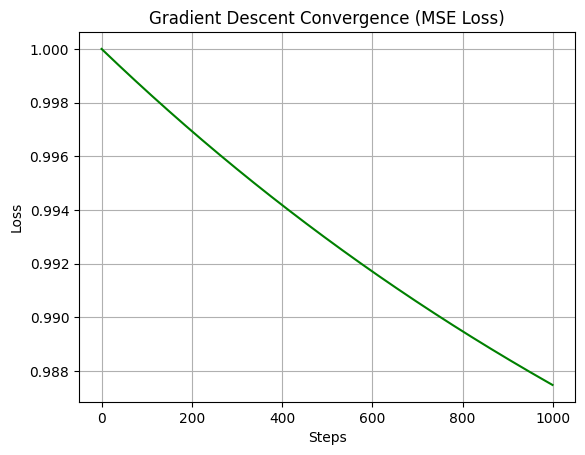

In [53]:
# Plot the loss curve
plt.plot(residual_list, color='green')
plt.title("Gradient Descent Convergence (MSE Loss)")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

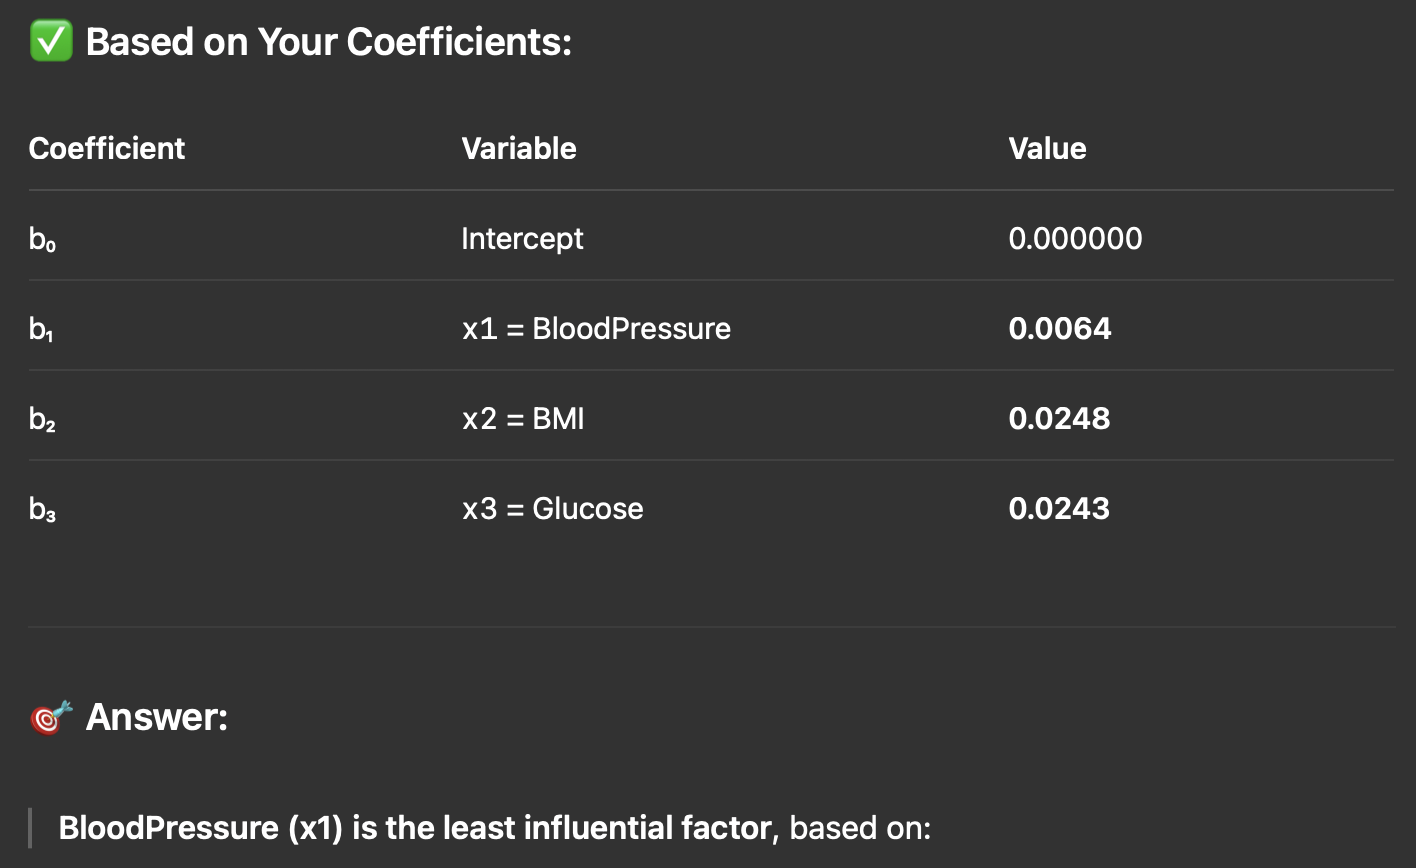

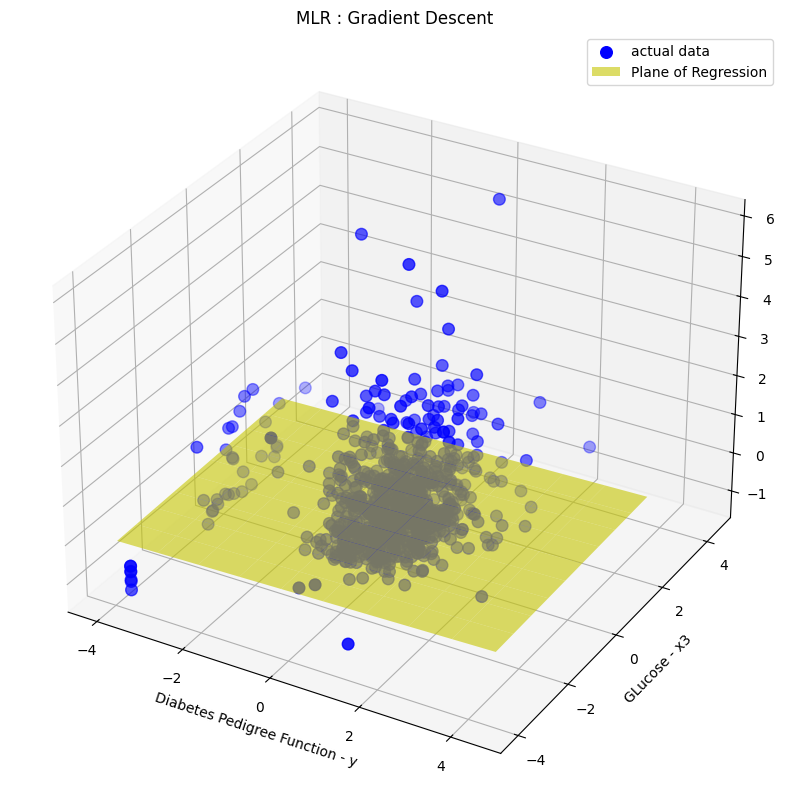

In [59]:
# the plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

# actual data plot
ax.scatter(x1,x2,y, color = 'blue', s = 70, label = 'actual data')
# predicted data plot
# ax.scatter(x1,x2,y_pred, color = 'red', s = 70, label = 'predicted data')

# the girds
x2_grid, x3_grid = np.meshgrid(np.linspace(min(x2),max(x2),10), np.linspace(min(x3),max(x3),10))
x1_fixed = np.mean(x1)
y_grid = b[0] + b[1]*x1_fixed + b[2]*x2_grid + b[3]*x3_grid

# regression plane
ax.plot_surface(x2_grid,x3_grid,y_grid, color = 'yellow', alpha = 0.6, label = 'Plane of Regression')

ax.set_xlabel('BMI - x2')
ax.set_ylabel('GLucose - x3')
ax.set_xlabel('Diabetes Pedigree Function - y')
ax.set_title('MLR : Gradient Descent')
plt.legend()
plt.show()

# NOTE : Based on the values of coefficents of b vector. The coeff with least value is leas influential and we have to fix it to some constant value : mean / 0/ -0.5 / 0.5 etc.